<a href="https://colab.research.google.com/github/fatmatosunytu/5/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Gerekli kütüphaneleri içe aktar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [3]:

# Veri Kümesini Hazırlama
iris = pd.read_csv("Iris.csv")  # CSV dosyasını oku

# İlk 5 satırı görüntüle
iris.head()

# Veri setinin özet istatistiklerini görüntüle
iris.describe(include="all")

# Veri seti hakkında genel bilgi al
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Veri setinin özet istatistiklerini görüntüle
iris.describe(include="all")


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:

# Veri seti hakkında genel bilgi al
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


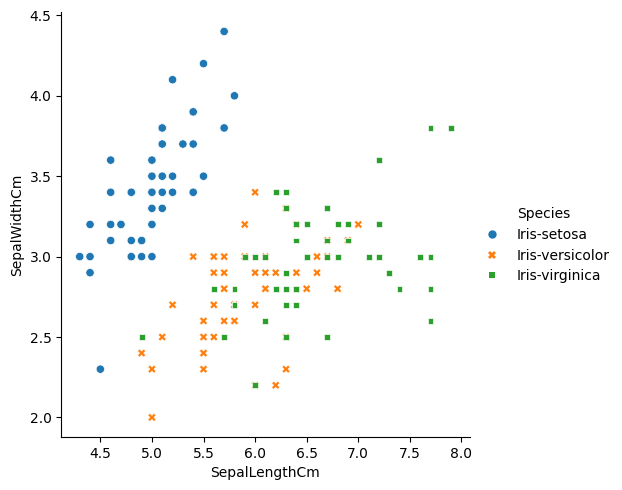

In [7]:
# Veri Kümesi İnceleme
sns.relplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, hue='Species', style='Species')
plt.show()


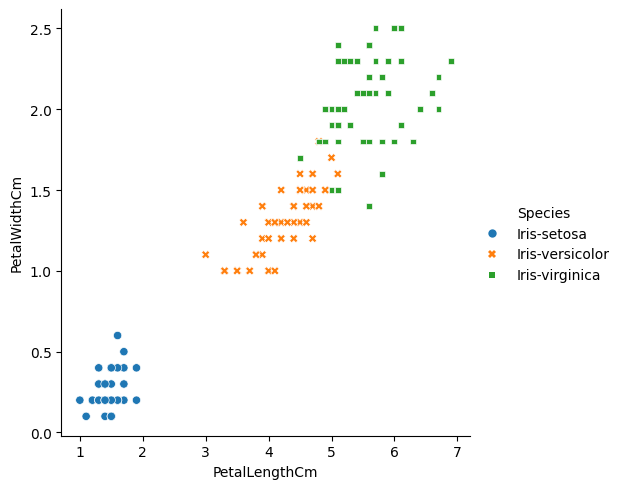

In [8]:
sns.relplot(x='PetalLengthCm', y='PetalWidthCm', data=iris, hue='Species', style='Species')
plt.show()

In [24]:
# Veri Ön İşleme
X = iris.iloc[:, 0:4].values  # İlk 4 sütunu (özellikleri) bağımsız değişken olarak al
y = iris.iloc[:, 4].values    # 5. sütunu (Species) bağımlı değişken olarak al

In [25]:
# Veri Kümesini Eğitim ve Test Olarak Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder ile kategorik veriyi sayısal hale getir
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(iris.iloc[:, 4])  # Species sütununu encode et

# Eğitim ve test setlerini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Naive Bayes Modelini Tanımla ve Eğit
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)



GaussianNB()

In [33]:
# Eğitim Verisi Üzerindeki Başarıyı Ölç
acc_gaussian = gaussian.score(X_train, y_train)
print("Eğitim Doğruluğu: %.2f" % acc_gaussian)

# Test Verisi Üzerinde Tahmin Yap
y_pred = gaussian.predict(X_test)

# Test Verisi Üzerindeki Başarıyı Ölç
acc_nb = accuracy_score(y_test, y_pred)
print("Test Doğruluğu: %.2f" % acc_nb)


Eğitim Doğruluğu: 0.60
Test Doğruluğu: 0.20


In [37]:
# Test Verisi Üzerinde Tahmin Yap
y_pred = gaussian.predict(X_test)


In [34]:
# Eğitim Verisi Üzerindeki Başarıyı Ölç
acc_gaussian = gaussian.score(X_train, y_train)
print("Eğitim Doğruluğu: %.2f" % acc_gaussian)

Eğitim Doğruluğu: 0.60


In [41]:
# Modelin Test Seti Üzerindeki Doğruluğunu Ölçme
acc_nb = accuracy_score(y_test, y_pred)
print("Test Doğruluğu: %.2f" % acc_nb)

# Karışıklık Matrisi ve Sınıflandırma Metrikleri
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Confusion Matrix:\n", cm)
print("Precision: %.2f" % precision)
print("Recall: %.2f" % recall)
print("F1-score: %.2f" % f1)


Test Doğruluğu: 0.20
Confusion Matrix:
 [[0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Precision: 0.19
Recall: 0.20
F1-score: 0.14


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
